# Breast Cancer Data Analysis Project

This Juptyer Notebook contains data science exericses pertaining to the Breast Cancer Data set in order to find trends and more information about the data. 

In [42]:
# Packages used in this exercise.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

## Exploratory Data Analysis

The csv file is read into the notebook using the `pandas` package. Then, the first 5 rows are shown below using the `.head()` function.

In [43]:
df = pd.read_csv('BRCA.csv')
print("The total number of patients in the dataset is {}.".format(len(df)))
df.head()


The total number of patients in the dataset is 341.


,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [44]:
df.tail()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning

As shown above, there are some rows and columns with `NaN` values. Therefore, we will clean the data by removing rows and columns that have `NaN` values.

In [45]:
df_cleaned = df.dropna()
print("Actually, there are {} patients in the dataset after data cleaning".format(len(df_cleaned)))

Actually, there are 317 patients in the dataset after data cleaning


## Data Analysis

**Question: What is the minimum age, maximum age, median age, mean age, and mode age of the dataset?**

In [46]:
print("Patient Age Statistics")
print("Min: {}".format(np.min(df_cleaned['Age'])))
print("Max: {}".format(np.max(df_cleaned['Age'])))
print("Median: {}".format(np.median(df_cleaned['Age'])))
print("Mean: {:.2f}".format(np.average(df_cleaned['Age']))) #:.2f formats the number such that it has up to 2 decimal points
print("Mode: {}".format(stats.mode(df_cleaned['Age']).mode[0]))

Patient Age Statistics
Min: 29.0
Max: 90.0
Median: 58.0
Mean: 58.73
Mode: 59.0


**Question: What is the time difference between the surgery date and the last visit date? Create a new column that calculates the time difference**
**in days and find the longest time difference for a patient that is currently alive. Is the patient alive or dead?**

In [47]:
df_cleaned['Time Difference'] = (pd.to_datetime(df_cleaned['Date_of_Last_Visit']) - pd.to_datetime(df_cleaned['Date_of_Surgery'])).dt.days
# pd.to_datetime() converts the column into datetime objects to obtain the time delta
df_cleaned.head()
max_time_diff = np.max(df_cleaned['Time Difference'])
max_time_index = df_cleaned['Time Difference'].idxmax()
row_max_time = df_cleaned.loc[max_time_index]
print("The longest time difference between visits is {} days and this patient is {}.".format(max_time_diff, row_max_time['Patient_Status']))

The longest time difference between visits is 3019 days and this patient is Dead.


/var/folders/gy/1f1fznt902v9q08yln7xz4vc0000gn/T/ipykernel_50043/3752803843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Time Difference'] = (pd.to_datetime(df_cleaned['Date_of_Last_Visit']) - pd.to_datetime(df_cleaned['Date_of_Surgery'])).dt.days


**Question: How many males and females are in the dataset?**

In [48]:
num_males = len(df_cleaned[df_cleaned['Gender'] == "MALE"])
num_females = len(df_cleaned[df_cleaned['Gender'] == "FEMALE"])
print("There are {} males and {} females in the dataset.".format(num_males, num_females))

There are 4 males and 313 females in the dataset.


**Discovery: There are also males in the dataset that have breast cancer.**

**Question: What are the different histologies of the patients and how many of each are there in the dataset?**

In [49]:
histology_counts = df_cleaned['Histology'].value_counts()
print(histology_counts)

Infiltrating Ductal Carcinoma     224
Infiltrating Lobular Carcinoma     81
Mucinous Carcinoma                 12
Name: Histology, dtype: int64


**Discovery: The most common histology seen in this dataset for breast cancer is *Infiltrating Ductal Carcinoma*.**

**Question: What are the highest and lowest protein expression levels for each protein.**


In [50]:
for protein_num in range(1,5): # There are 4 protein expression levels reported in this dataset.
    print("The minimum and maximum protein expression levels for Protein {} are {:.2f} and {:.2f}, respectively.".format(
        protein_num, np.min(df_cleaned['Protein{}'.format(protein_num)]), np.max(df_cleaned['Protein{}'.format(protein_num)])))


The minimum and maximum protein expression levels for Protein 1 are -2.14 and 1.59, respectively.
The minimum and maximum protein expression levels for Protein 2 are -0.98 and 3.40, respectively.
The minimum and maximum protein expression levels for Protein 3 are -1.63 and 2.19, respectively.
The minimum and maximum protein expression levels for Protein 4 are -2.03 and 1.63, respectively.


**Question: For each tumour_stage, what is the average protein expression level for each protein level?**
**What are some trends found in the data? Present this data visually.**

In [51]:
# Pivot Table (values are columns, index are the rows, there is an aggreation by the mean)
pivot_table_protein_avg = pd.pivot_table(df_cleaned, values=["Protein1", "Protein2", "Protein3", "Protein4"], index='Tumour_Stage', aggfunc='mean')
pivot_table_protein_avg # Allows for the table to be printed

,Protein1,Protein2,Protein3,Protein4
Tumour_Stage,,,,
I,-0.007066,0.993546,-0.143623,0.063371
II,-0.008442,0.972304,-0.076174,0.005261
III,-0.086872,0.862104,-0.101548,-0.034042


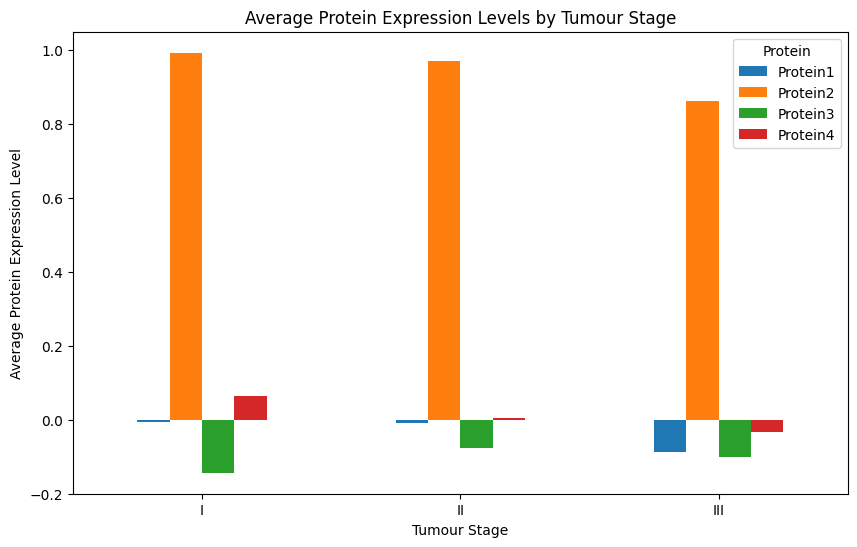

In [52]:
#Matplotlib is used to graph this data.
pivot_table_protein_avg.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Average Protein Expression Levels by Tumour Stage')
plt.xlabel('Tumour Stage')
plt.ylabel('Average Protein Expression Level')
plt.legend(title='Protein')
plt.show()

**Discovery: Protein 1 is expressed more negatively in the 3rd tumour stage. Protein 2 is expressed equally in all tumour stages. Protein 3 is expressed more negatively in the 1st tumour stage. Protein 4 is expressed positively in the 1st tumour stage and negatively in the 3rd tumour stage.**

**Question: Is there a correlation between the expression levels of Protein 1 and Protein 2 ?**

In [65]:
# .corr function will calculate the correlation coefficient
correlation_coefficient = df['Protein1'].corr(df['Protein2'])
print("Correlation between Protein 1 and Protein 2: {:.2f}".format(correlation_coefficient))

Correlation between Protein 1 and Protein 2: 0.24


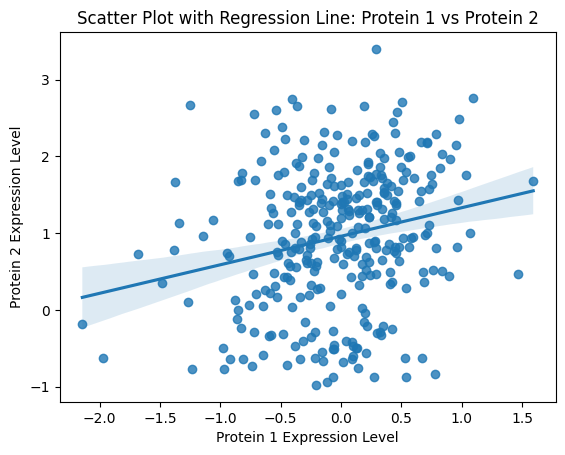

In [64]:
#Seaborn to plot the scatter plot
sns.regplot(x='Protein1', y='Protein2', data=df_cleaned)
plt.title('Scatter Plot with Regression Line: Protein 1 vs Protein 2')
plt.xlabel('Protein 1 Expression Level')
plt.ylabel('Protein 2 Expression Level')
plt.show()

**Discovery: There is not significant linear relationship between the expression levels of protein 1 and protein 2.**

**Question: For each tumour_stage, how many patients are alive or dead? Present this data visually.**

In [53]:
# Cross-tabulationg shows the count of patients for each combination of tumour stage and patient status. 

cross_tab = pd.crosstab(df_cleaned['Tumour_Stage'], df_cleaned['Patient_Status'])
print(cross_tab)

Patient_Status  Alive  Dead
Tumour_Stage               
I                  51     9
II                144    36
III                60    17


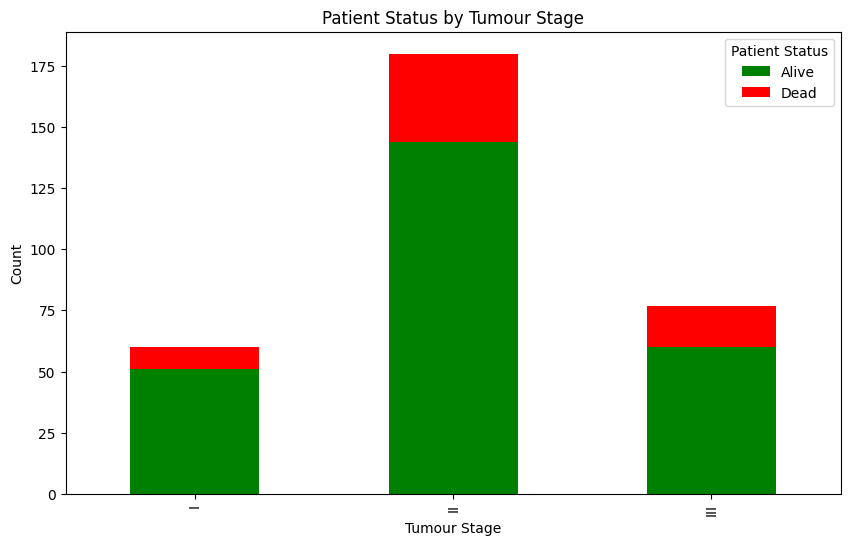

In [66]:
# Graphing a stacked bar graph
cross_tab.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))
plt.title('Patient Status by Tumour Stage')
plt.xlabel('Tumour Stage')
plt.ylabel('Count')
plt.legend(title='Patient Status', loc='upper right', labels=['Alive', 'Dead'])
plt.show()

**Discovery: There are more patients alive in the 2rd tumour stage and more patients dead in the 2nd tumour stage.**

**Question: What is the average age of patients for each Tumour Stage, grouped by their ER status?**

In [54]:
avg_age_by_er_status = df.groupby(['Tumour_Stage', 'ER status'])['Age'].mean()
avg_age_by_er_status

Tumour_Stage  ER status
I             Positive     62.359375
II            Positive     59.052910
III           Positive     55.753086
Name: Age, dtype: float64

**Discovery: All patients in the dataset were seen in the ER. The average age of patients is the highest in stage I and lowest in stage III.**

**Question: Is there a correlation between the type of surgery preformed and the Tumour Stage of patients?**

In [55]:
# Create a cross_tabulation and then run a chi-square test for independence. 
# The null hypothesis that surgery type and tumour stage are independent. 
surgery_tumour_stage_corr = pd.crosstab(df_cleaned['Surgery_type'], df_cleaned['Tumour_Stage'])
surgery_tumour_stage_corr

Tumour_Stage,I,II,III
Surgery_type,,,
Lumpectomy,22,36,8
Modified Radical Mastectomy,7,45,37
Other,18,56,23
Simple Mastectomy,13,43,9


In [57]:
from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(surgery_tumour_stage_corr)
print("Chi-square value: {}".format(chi2))
print("p-value: {:.5f}".format(p))

Chi-square value: 32.62301161312376
p-value: 0.00001


**Discovery: Since the p-value is less than 0.05, this suggest that there is an association between Surgery Type and Tumour Stage.**

**Question: What is the overall survival rate of patients in the dataset, and does it differ by Tumour Stage?**

In [63]:
# For the overall survival rate, we can use the patient_status table
overall_survival_rate = df['Patient_Status'].value_counts(normalize=True)['Alive'] * 100
print(" THe overall survival rate is {:.2f}%".format(overall_survival_rate))

# Groupby Tumour Stage to calculate survival rate by stage
# normalize creates a percentage 
survival_rate_by_stage = df.groupby('Tumour_Stage')['Patient_Status'].value_counts(normalize=True).unstack()['Alive'] * 100
print(survival_rate_by_stage)

 THe overall survival rate is 79.44%
Tumour_Stage
I      83.606557
II     79.120879
III    76.923077
Name: Alive, dtype: float64


**Discovery: As the tumour_stage increases, the survival rate decreases.**